<h6 style= 'color: green'>  Агломеративная кластеризация обычно используется в сценариях, где неизвестно заранее количество кластеров, которые нужно выделить. Этот метод также полезен, когда важно сохранить иерархическую структуру данных scikit-learn.org.

В процессе агломеративной кластеризации используется метрика, которая измеряет расстояние или сходство между объектами. Это может быть, например, евклидово расстояние, косинусное расстояние или другие метрики. Выбор метрики зависит от характера данных и от того, какое сходство между объектами следует учитывать при кластеризации ru.wikipedia.org.

Важно отметить, что агломеративная кластеризация является детерминированным методом, то есть результаты кластеризации будут одинаковыми при каждом выполнении алгоритма на одних и тех же данных. Это делает его устойчивым к потере информации о связях между объектами <h6>  

In [199]:
import warnings
warnings.simplefilter("ignore", UserWarning)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

import pickle
from tqdm import tqdm

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

- Теоритическая справка
- Игнорировать предупреждения типа UserWarning означает, что мы не хотим видеть сообщения, которые генерируются модулем warnings в Python, когда мы запускаете свой код. 
- Эти предупреждения обычно информируют вас о возможных проблемах или рисках, связанных с вашим кодом, но не являются ошибками. Например, предупреждение UserWarning может появиться, когда вы используете устаревшую функцию или когда вы делаете что-то, что может привести к непредвиденным результатам. Игнорировать эти предупреждения может быть опасно, так как вы можете пропустить важную информацию или советы, которые могут помочь вам улучшить или исправить свой код.

- Теоритическая справка
- Функция silhouette_score - это функция из библиотеки scikit-learn, которая позволяет оценить качество кластеризации данных. Кластеризация - это процесс разделения данных на группы (кластеры) по их сходству. 
- Коэффициент силуэта - это мера, которая показывает, насколько хорошо каждый объект данных соответствует своему кластеру и насколько он отличается от других кластеров. Коэффициент силуэта может принимать значения от -1 до 1, где 1 означает идеальную кластеризацию, а -1 означает очень плохую кластеризацию.
- Функция silhouette_score вычисляет средний коэффициент силуэта по всем объектам данных и возвращает его как результат. Чтобы использовать эту функцию, вам нужно импортировать ее из модуля sklearn.metrics и передать ей массив данных, массив меток кластеров и метрику расстояния между объектами.

In [200]:
# импортируем модуль pandas для работы с табличными данными
import pandas as pd
# читаем файл CSV с подготовленными данными по кредитам в Германии и сохраняем его в переменную df
df = pd.read_csv('german_credit_data_prepared1.csv')
# удаляем столбец 'Unnamed: 0', который не несет полезной информации, и сохраняем остальные данные в переменную X
X = df.drop('Unnamed: 0', axis = 1)
# выводим первые пять строк данных X на экран
X.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Purpose
0,0.857143,1.0,0.666667,0.5,1.0,0.000000,0.050567,0.714286
1,0.053571,0.0,0.666667,0.5,0.0,0.333333,0.313690,0.714286
2,0.535714,1.0,0.333333,0.5,0.0,1.000000,0.101574,0.428571
3,0.464286,1.0,0.666667,0.0,0.0,0.000000,0.419941,0.571429
4,0.607143,1.0,0.666667,0.0,0.0,0.000000,0.254209,0.142857


In [248]:
X.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Purpose,Labels_Agg2,Labels_Agg3,Labels_Agg6,Labels_DBSCAN
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.295464,0.690000,0.634667,0.535500,0.276250,0.525667,0.166241,0.411143,0.308000,0.946000,2.079000,4.897000
std,0.203133,0.462725,0.217871,0.265632,0.395006,0.419213,0.155317,0.282591,0.461898,0.830526,1.538547,4.130066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.142857,0.000000,0.666667,0.500000,0.000000,0.000000,0.061379,0.142857,0.000000,0.000000,1.000000,1.000000
50%,0.250000,1.000000,0.666667,0.500000,0.000000,0.333333,0.113871,0.428571,0.000000,1.000000,2.000000,5.000000
75%,0.410714,1.000000,0.666667,0.500000,0.500000,1.000000,0.204812,0.714286,1.000000,2.000000,3.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,18.000000


In [201]:
# импортируем модуль pickle для загрузки сохраненных объектов
import pickle
# загружаем объект umap, который содержит вложение данных в трехмерное пространство, из файла pkl
umap = pickle.load(open('german_credit_umap.pkl', 'rb'))

# импортируем модуль numpy для работы с массивами данных
import numpy as np
# устанавливаем случайное зерно для воспроизводимости результатов
np.random.seed(42)
# генерируем массив случайных цветов для каждого объекта данных
colors = np.random.rand(X.shape[0], 4)

# определяем функцию, которая рисует диаграмму рассеяния umap с заданными метками
def draw_umap_scatter(labels=[]):
    # получаем вложение данных из объекта umap
    u = umap.embedding_
    # создаем новый рисунок
    fig = plt.figure()
    # добавляем трехмерную ось к рисунку
    ax = fig.add_subplot(111, projection='3d')
    # выбираем цвета для точек в зависимости от наличия меток
    c = labels if len(labels) > 0 else colors 
    # рисуем диаграмму рассеяния с цветами c и цветовой картой cool
    scatter = ax.scatter(u[:,0], u[:,1], u[:,2], c=c, cmap='cool')
    # добавляем цветовую шкалу к рисунку
    colorbar = fig.colorbar(scatter)
    plt.show()


- Справка:
- X.shape - это атрибут, который возвращает размерность массива данных X. Атрибут shape является свойством объектов, которые имеют структуру, например, массивы, тензоры, матрицы и т.д.
- Размерность массива определяет, сколько элементов он содержит по каждой оси. Например, если X - это двумерный массив (матрица) с 3 строками и 4 столбцами, то X.shape будет равен (3, 4). Если X - это одномерный массив (вектор) с 5 элементами, то X.shape будет равен (5,). Если X - это трехмерный массив (тензор) с 2 слоями, каждый из которых содержит 3 строки и 4 столбца, то X.shape будет равен (2, 3, 4).
- Атрибут shape часто используется для проверки формы массива, чтобы избежать ошибок при выполнении операций с ним. Например, если мы хотим сложить два массива, то они должны иметь одинаковую форму, иначе получим ошибку. Мы также можете изменять форму массива с помощью методов reshape, flatten, transpose.


# Агломеративная кластеризация
...

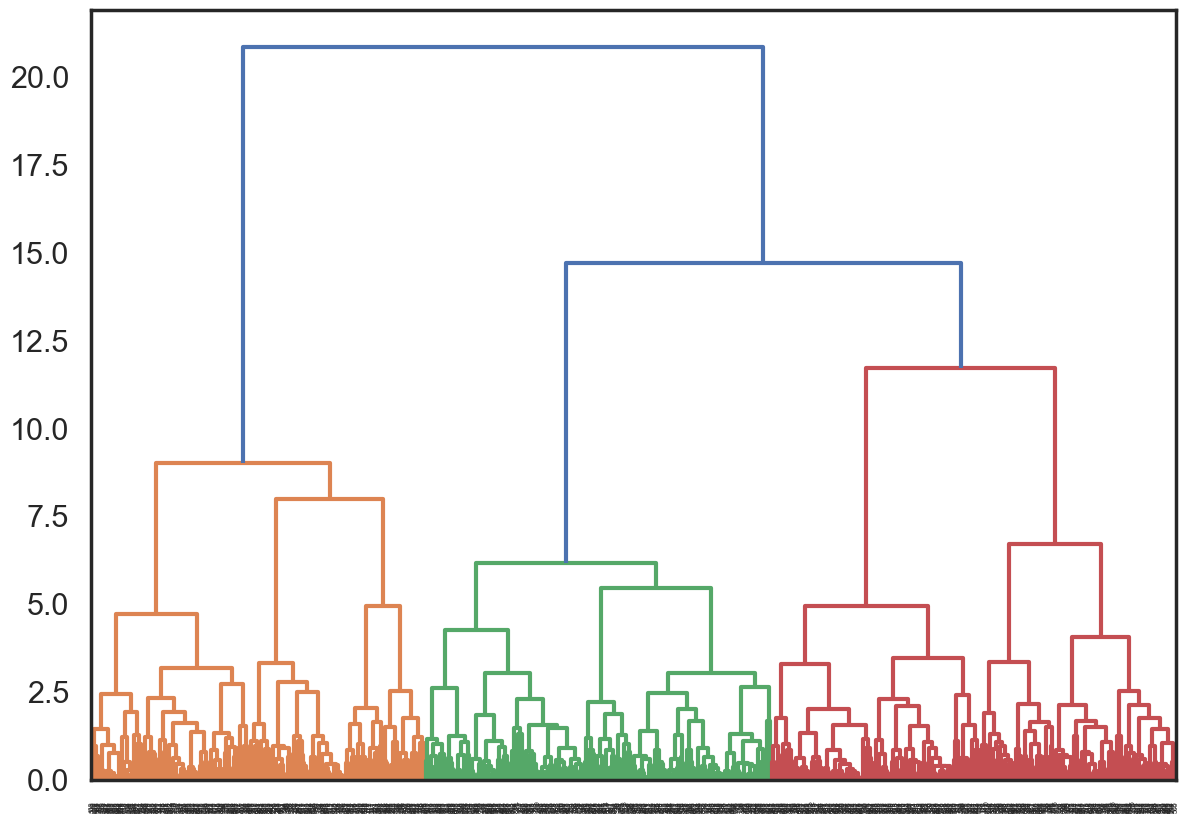

In [202]:
# импортируем функцию linkage из модуля scipy.cluster.hierarchy для построения иерархической кластеризации
from scipy.cluster.hierarchy import linkage
# импортируем функцию dendrogram из модуля scipy.cluster.hierarchy для построения дендрограммы
from scipy.cluster.hierarchy import dendrogram

# применяем функцию linkage к данным X с методом 'ward', который минимизирует внутрикластерное расстояние
linkage_ = linkage(X, method='ward')
# применяем функцию dendrogram к результату linkage и сохраняем его в переменную dendrogram_
dendrogram_ = dendrogram(linkage_)


- Теоритическая справка
Мы использовали функции linkage и dendrogram из модуля scipy.cluster.hierarchy для построения иерархической кластеризации и дендрограммы для данных X. Иерархическая кластеризация - это метод, который объединяет объекты данных в группы на основе их близости, начиная с самых маленьких кластеров и заканчивая одним большим кластером.
- **Дендрограмма** - это диаграмма, которая показывает структуру иерархической кластеризации в виде дерева, где каждая ветвь соответствует кластеру, а высота ветви отражает расстояние между кластерами. 
- Мы использовали метод 'ward' для функции linkage, который минимизирует сумму квадратов расстояний внутри каждого кластера. Это помогает нам найти оптимальное количество кластеров, которое максимизирует однородность внутри кластера и различие между кластерами. 

Вывод:
В Дендрограмме есть больших 7 кластеров (2 оранжевых,  2 зелёных, 2 красных.
Возможные разбиения:
1. Самое хорошее разбиение 1 кластер оранж, в районе ~ 4.8. 
2. зел 1, в районе ~ 4.7
3. красн 1, в районе ~ 4.9

Дендрограмма подтверждает первоначальное наблюдение, из визуализации, что есть 3 больших кластера и 6 ветвей. 
Дальнейшие разбиения дробят на много маленьких кластеров, рассматривать которые может быть нецелесообразно. 

Это довольно правильный вывод, но я бы добавил еще несколько замечаний:

- Мы можем использовать функцию silhouette_score, чтобы количественно оценить качество разбиения на кластеры. 
Эта функция возвращает среднее значение коэффициента силуэта по всем объектам данных, где 1 означает идеальную кластеризацию, а -1 означает очень плохую кластеризацию. Вы можете найти больше информации и примеры использования этой функции в.
- Мы также можете использовать функцию AgglomerativeClustering из библиотеки scikit-learn, чтобы автоматически разбить данные на заданное количество кластеров, используя метод 'ward'. Эта функция возвращает массив меток кластеров для каждого объекта данных, которые вы можете использовать для визуализации или анализа. 

100%|█████████████████████████████████████████████| 8/8 [00:01<00:00,  6.57it/s]


Text(0, 0.5, 'Оценка силуэта')

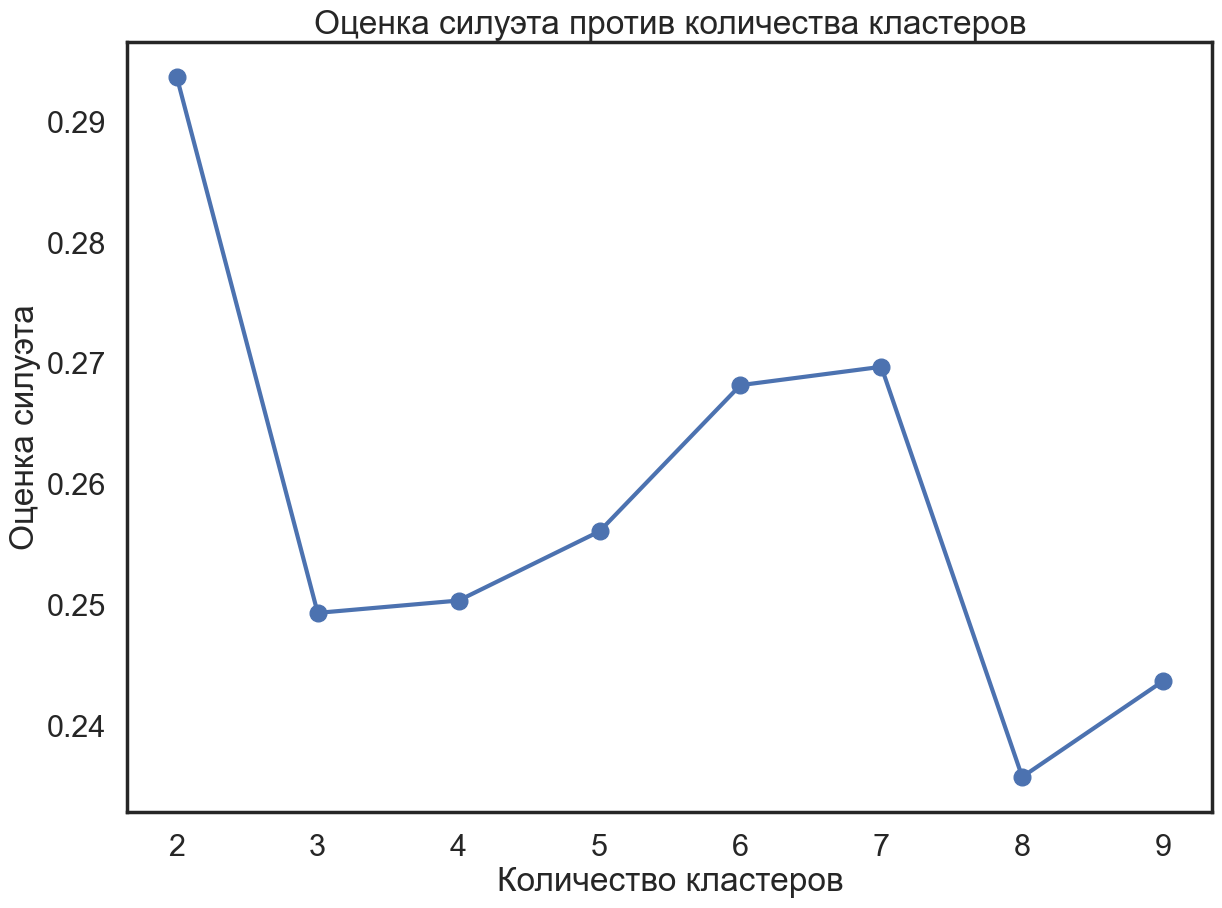

In [203]:
# импортируем модуль tqdm для отображения прогресса цикла
from tqdm import tqdm
# импортируем класс AgglomerativeClustering из библиотеки scikit-learn для иерархической кластеризации
from sklearn.cluster import AgglomerativeClustering
# импортируем функцию silhouette_score из библиотеки scikit-learn для оценки качества кластеризации
from sklearn.metrics import silhouette_score
# импортируем модуль matplotlib.pyplot для построения графиков
import matplotlib.pyplot as plt

# создаем пустой список для хранения значений коэффициента силуэта
silhouette = []
# запускаем цикл от 2 до 9 включительно
for i in tqdm(range(2, 10)):
    # применяем класс AgglomerativeClustering к данным X с заданным количеством кластеров i, метрикой евклидова расстояния и методом 'ward'
    agg = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward').fit(X)
    # получаем метки кластеров для каждого объекта данных
    labels = agg.labels_
    # вычисляем значение коэффициента силуэта для данного разбиения на кластеры
    score = silhouette_score(X, labels)
    # добавляем значение коэффициента силуэта в список
    silhouette.append(score)
    
# рисуем график зависимости коэффициента силуэта от количества кластеров
plt.plot(range(2, 10), silhouette, marker='o')
plt.title('Оценка силуэта против количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Оценка силуэта')

Я бы добавил еще несколько замечаний:
График силуэтного коэффициента показывает, что лучше всего:
* разбить на 2 кластера (~0.3)
* разбить на 7 (0.27)
* разбить на 6 (~0.27)
А при 3 и 4 мы видим серьезное падение значения силуэтного коэффициента.
При этом уже 6 кластеров - это много. 
- Мы можем объяснить, почему при 3 и 4 кластерах силуэтный коэффициент падает, анализируя расстояния между кластерами на дендрограмме. 
Например, вы можете написать, что при 3 кластерах один из кластеров содержит очень разные объекты, которые увеличивают внутрикластерное расстояние, а при 4 кластерах два из кластеров очень близки друг к другу, что уменьшает межкластерное расстояние.


Агломеративный кластеризатор из библиотеки scikit-learn для иерархической кластеризации
ОПроецируем большие группы. 
Обучим кластеризатор и изучим распределение признаков по кластерам.

In [204]:
# импортируем класс AgglomerativeClustering из библиотеки scikit-learn для иерархической кластеризации
from sklearn.cluster import AgglomerativeClustering
# применяем класс AgglomerativeClustering к данным X с заданным количеством кластеров 2, метрикой евклидова расстояния и методом 'ward'
agg = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward').fit(X)


In [205]:
# получаем доступ к объекту данных X, который является табличным типом данных pandas.DataFrame
# import pandas as pd
X = pd.DataFrame(X)
# добавляем новый столбец 'Labels_Agg2' к данным X, который содержит метки кластеров, полученные от объекта agg, который является экземпляром класса AgglomerativeClustering
X['Labels_Agg2'] = agg.labels_


In [206]:
# получаем доступ к объекту данных X, который является табличным типом данных pandas.DataFrame
# import pandas as pd
X = pd.DataFrame(X)
# получаем серию, которая содержит количество объектов данных в каждом кластере, определенном столбцом 'Labels_Agg2'
X['Labels_Agg2'].value_counts(normalize=True)
# делим каждое значение в серии на общее количество объектов данных, чтобы получить долю объектов данных в каждом кластере
# устанавливаем параметр normalize в True, чтобы выполнить это деление автоматически



Labels_Agg2
0    0.692
1    0.308
Name: proportion, dtype: float64

Вывод:
- Видим, что группы не равны.
- Одна группа более чем в 2 раза больше второй. 

In [207]:
# импортируем модуль pandas для работы с табличными данными
import pandas as pd
# получаем доступ к объекту данных X, который является табличным типом данных pandas.DataFrame
X = pd.DataFrame(X)
# группируем данные по столбцу 'Labels_Agg2', который содержит метки кластеров, полученные от объекта agg, который является экземпляром класса AgglomerativeClustering
# вычисляем медиану по каждому столбцу для каждой группы
# транспонируем результат, чтобы поменять местами строки и столбцы
# округляем значения до двух знаков после запятой
# сохраняем результат в переменную median
X.groupby('Labels_Agg2').median().T.round(2)


Labels_Agg2,0,1
Age,0.29,0.17
Sex,1.00,0.00
Job,0.67,0.67
Housing,0.50,0.50
Saving accounts,0.00,0.00
Checking account,0.33,0.33
Credit amount,0.12,0.09
Purpose,0.43,0.57


**Напоминание:**
- поля типа Sex, Housing и другие являются категориальными. 
А для удобства мы их закодировали в порядкую шкалу. 
Центральная тенденция дает минимальное представление о признаке в группе и мы делаем первый приблизительный, самый общий анализ. 

Выявляем:
**Одинаковое (медиана) среднее по** большинству признаков: занятости (Job), типу проживания (Housing), размеру накоплений (Saving accounts), типу аккаунта (Checking account)(что бы это ни было).

**Отличается среднее по**:
* возраст
* пол 
* размер кредита
* цель кредитования 


- Вимательнее изучаем распределение признаков по группам. 
- Для этого используем сводные графики с наложением по цвету по каждому признаку.


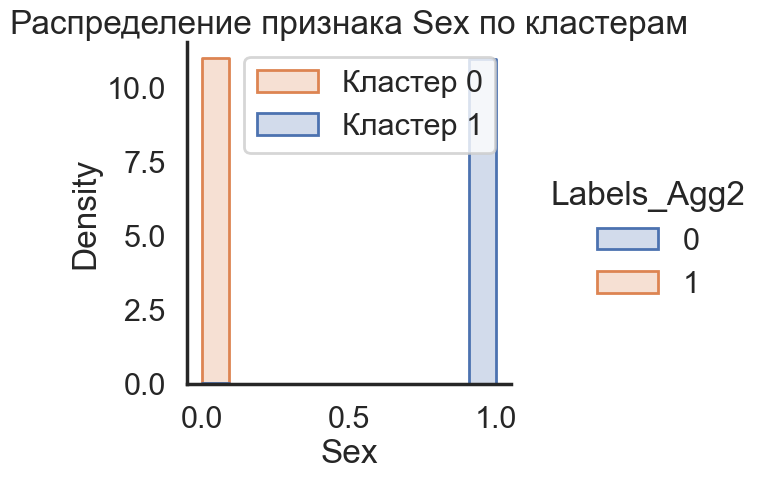

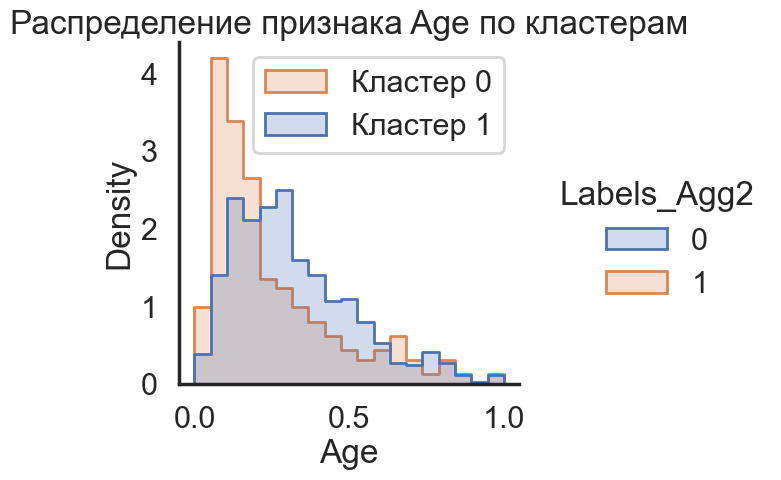

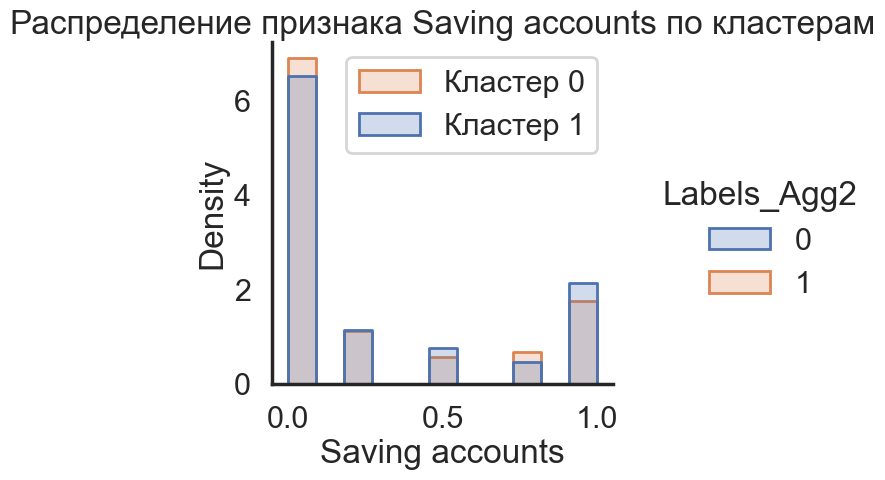

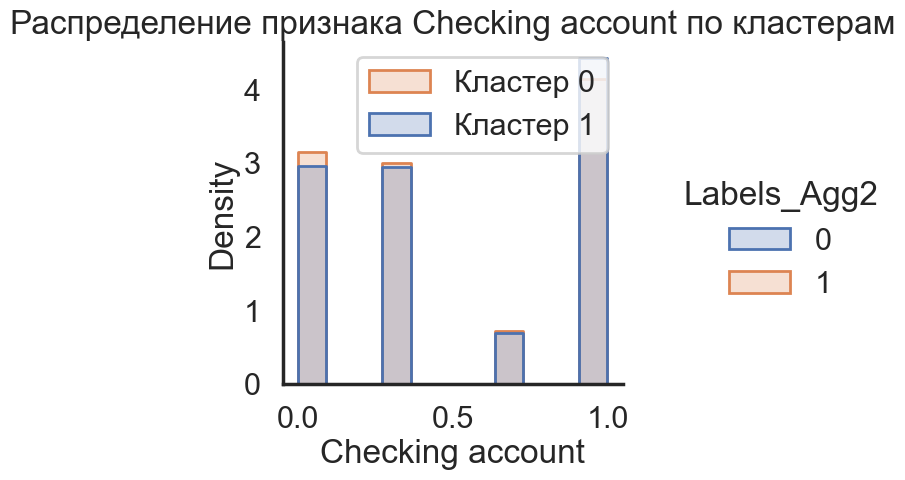

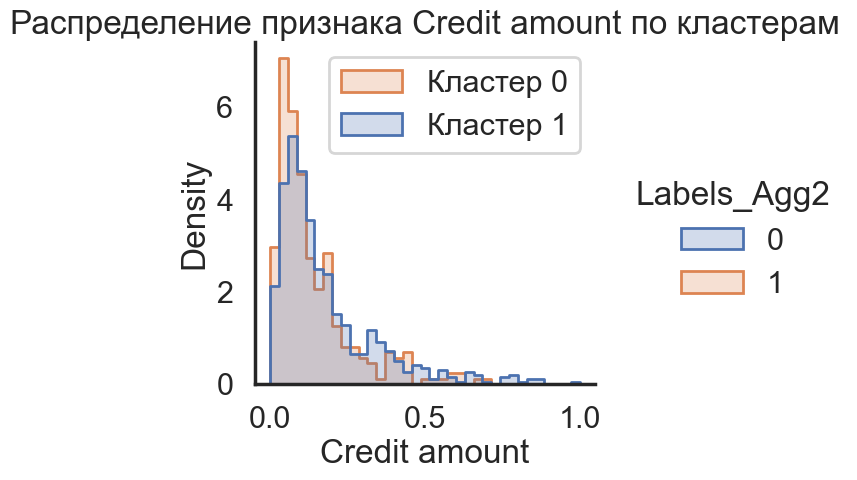

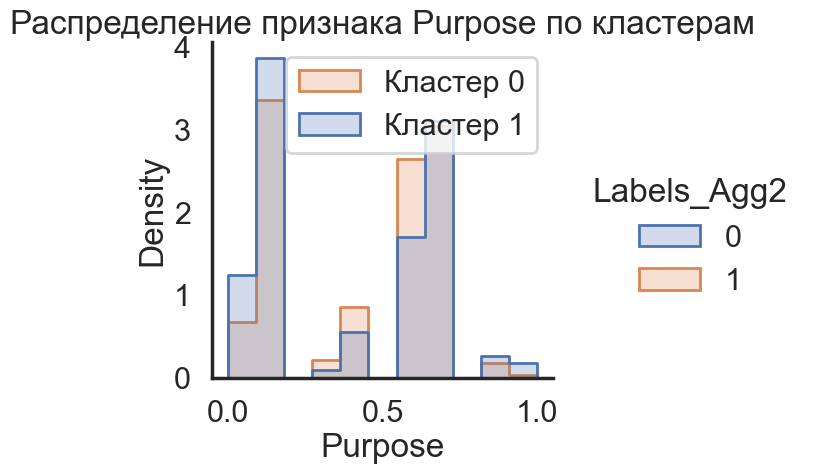

In [208]:
# импортируем модуль seaborn для построения графиков
import seaborn as sns
# импортируем модуль matplotlib.pyplot для работы с графиками
import matplotlib.pyplot as plt
# запускаем цикл по списку столбцов, которые мы хотим визуализировать
for column in ['Sex', 'Age', 'Saving accounts', 'Checking account', 'Credit amount', 'Purpose']:
    # рисуем диаграмму распределения по столбцу column, разделяя данные по меткам кластеров 'Labels_Agg2'
    # используем параметр element="step", чтобы нарисовать ступенчатые кривые
    # используем параметр stat="density", чтобы нарисовать плотность распределения, а не количество
    # используем параметр common_norm=False, чтобы не нормализовать плотность по всем кластерам
    sns.displot(X, x=column, hue='Labels_Agg2', element="step", stat="density", common_norm=False)
    # добавляем заголовок к графику, описывая, что он показывает
    plt.title('Распределение признака ' + column + ' по кластерам')
    # добавляем легенду к графику, указывая, какой цвет соответствует какому кластеру
    plt.legend(['Кластер 0', 'Кластер 1'])
    # показываем график на экране
    plt.show()


**Обратимся к файлу EDA_, где можно посмотреть изначальный датасет**
Прежде всего нам надо вспомнить как мы закодировали признаки, чтобы раскодировать их для интерпретации.

> Sex ['female' 'male']

> Housing ['free' 'own' 'rent']

> Saving accounts ['little' 'moderate' 'quite rich' 'rich' 'unknow']

> Checking account ['little' 'moderate' 'rich' 'unknow']

> Purpose ['business' 'car' 'domestic appliances' 'education' 'furniture/equipment' 'radio/TV' 'repairs' 'vacation/others']


Прежде всего, видим, что группы строго разбиты по полу. 
В следующий раз посмотрим на визуализацию PCA.
У нас есть признак с 2мя возможными значениями - что можно ожидать увидеть в 2х кластерах?

Так что прочие признаки просто описывают разницу в кредитном поведении мужчин и женщин.
- Группа 0 представляет из себя мужчин. 
- Мужчины в среднем старше женщин.
- Мужчины в среднем берут кредит большего размера (самые большие кредиты берут в основном мужчины).
- А это плюс 
> А также есть важное отличие в целях кредитования. Мужчины берут больше кредитов на бизнес, машины, ремонт и отдых. И, соответственно, меньше на образование, мебель (значительно) и бытовую технику. А вот на телевизор/радио поровну с женщинами. 

Проведем визуальную валидацию кластеризации с помощью ранее обучненой модели UMAP

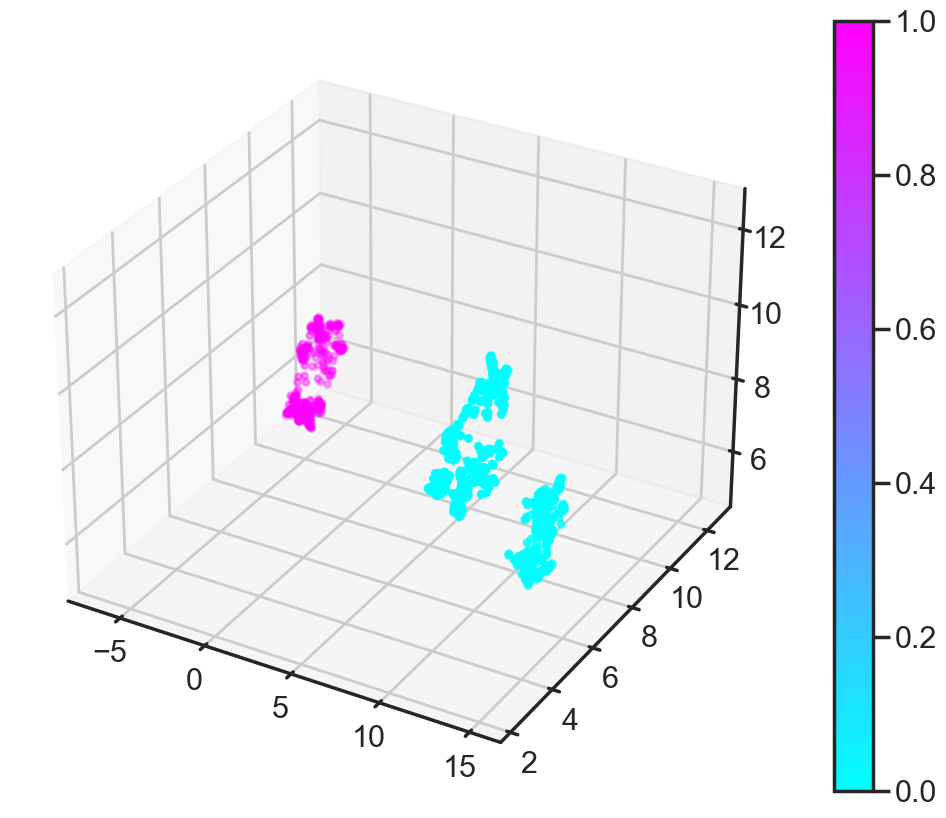

In [209]:
# вызываем функцию draw_umap_scatter с аргументом X['Labels_Agg2'], который содержит метки кластеров, полученные от объекта agg, который является экземпляром класса AgglomerativeClustering
draw_umap_scatter(X['Labels_Agg2'])
# функция draw_umap_scatter рисует диаграмму рассеяния umap с заданными метками
# umap - это метод, который сжимает данные в меньшее пространство, сохраняя при этом их структуру и сходство
# диаграмма рассеяния показывает, как объекты данных распределены в трехмерном пространстве, и как они разделены на кластеры
# цвета точек соответствуют меткам кластеров, а цветовая шкала показывает, какой цвет соответствует какому кластеру
# функция draw_umap_scatter использует объект umap, который загружен из файла pkl, и модули numpy, matplotlib и seaborn для работы с данными и графиками


Вывод: 
- В этом коде мы использовали функцию draw_umap_scatter, чтобы визуализировать результаты кластеризации данных с двумя кластерами, полученными от объекта agg. 
Мы видим, что кластеры хорошо разделены в трехмерном пространстве, и что они соответствуют разделению по полу: кластер 0 - мужчины, кластер 1 - женщины. Это подтверждает наш предыдущий анализ, который показал, что мужчины и женщины имеют разные характеристики кредитного поведения.
Мы довольны результатом кластеризации с двумя кластерами, потому что он хорошо соответствует вашей интуиции и визуализации. Считаем, что это отличное попадание, то есть совпадение между вашими ожиданиями и реальностью.
График силуэтного коэффициента, который показывает, насколько хорошо объекты данных соответствуют своим кластерам, говорит, что при трех кластерах качество кластеризации ухудшится на 0.05 по сравнению с двумя кластерами. 
- Далее могу предположить попробовать три кластера, несмотря на то, что график силуэтного коэффициента говорит, что это ухудшит качество кластеризации.
- А если, провести блиц-оценку по визуализации и если попадание будет, то провести повторный анализ.
Конечно, возможно, стоит исключить признак пола из анализа и попробовать другие методы кластеризации, которые могут учесть другие факторы, влияющие на кредитное поведение (но, это также предположение).

> Проведем повторно c 3 кластерами


In [210]:
# импортируем класс AgglomerativeClustering из библиотеки scikit-learn для иерархической кластеризации
# from sklearn.cluster import AgglomerativeClustering
# применяем класс AgglomerativeClustering к данным X с заданным количеством кластеров 3, метрикой евклидова расстояния и методом 'ward'
# метод 'ward' минимизирует сумму квадратов расстояний внутри каждого кластера
# сохраняем результат в переменную agg3, которая является экземпляром класса AgglomerativeClustering
agg3 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward').fit(X)


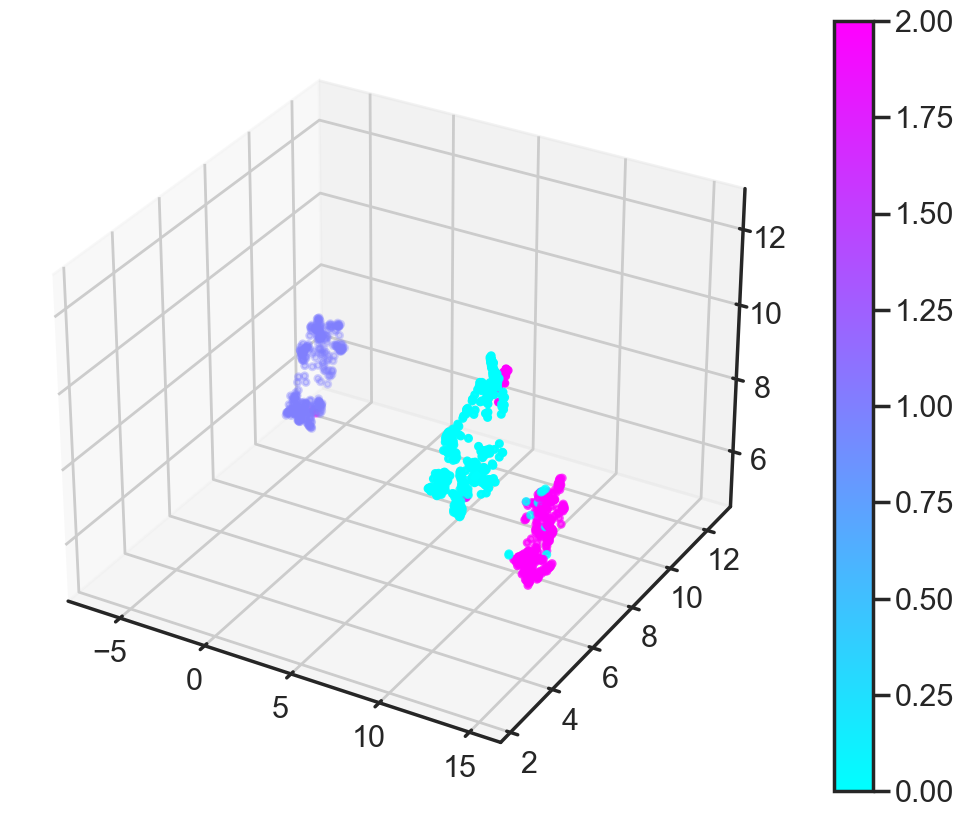

In [211]:
# вызываем функцию draw_umap_scatter с аргументом agg3.labels_, который содержит метки кластеров, полученные от объекта agg3, который является экземпляром класса AgglomerativeClustering с тремя кластерами
draw_umap_scatter(agg3.labels_)
# функция draw_umap_scatter рисует диаграмму рассеяния umap с заданными метками
# umap - это метод, который сжимает данные в меньшее пространство, сохраняя при этом их структуру и сходство
# диаграмма рассеяния показывает, как объекты данных распределены в трехмерном пространстве, и как они разделены на кластеры
# цвета точек соответствуют меткам кластеров, а цветовая шкала показывает, какой цвет соответствует какому кластеру
# функция draw_umap_scatter использует объект umap, который загружен из файла pkl, и модули numpy, matplotlib и seaborn для работы с данными и графиками


Отлично разделились 3 на группы 

Сохраним отметки рядом с прежними (для 3х кластеров)

In [212]:
# получаем доступ к объекту данных X, который является табличным типом данных pandas.DataFrame
# добавляем новый столбец 'Labels_Agg3' к данным X, который содержит метки кластеров, полученные от объекта agg3, который является экземпляром класса AgglomerativeClustering с тремя кластерами
X['Labels_Agg3'] = agg3.labels_


In [213]:
# получаем серию, которая содержит количество объектов данных в каждом кластере, определенном столбцом 'Labels_Agg3'
X['Labels_Agg3'].value_counts(normalize=True)
# делим каждое значение в серии на общее количество объектов данных, чтобы получить долю объектов данных в каждом кластере
# получаем серию, которая содержит количество объектов данных в каждом кластере, определенном столбцом 'Labels_Agg3'
# устанавливаем параметр normalize в True, чтобы выполнить это деление автоматически

Labels_Agg3
0    0.373
2    0.319
1    0.308
Name: proportion, dtype: float64

Вау, при таком разделении группы получаются почти равным между собой.

In [214]:
# Группируем данные по столбцу Labels_Agg3 и вычисляем медиану по каждой группе
# Транспонируем результат, чтобы строки и столбцы поменялись местами
# Округляем значения до двух знаков после запятой
X.groupby('Labels_Agg3').median().T.round(2)

Labels_Agg3,0,1,2
Age,0.30,0.17,0.25
Sex,1.00,0.00,1.00
Job,0.67,0.67,0.67
Housing,0.50,0.50,0.50
Saving accounts,0.50,0.00,0.00
Checking account,1.00,0.33,0.00
Credit amount,0.11,0.09,0.13
Purpose,0.43,0.57,0.43
Labels_Agg2,0.00,1.00,0.00


Поля `Job` и `Housing` по прежнему в среднем одинаковы. 

Из таблицы видно, что распалась (её не видно)  одна группа (мужчин), вторая (женская) осталась прежней, поэтому ее можно исключить из анализа, мы все о ней уже знаем. Поэтому будем анализировать только группы 0 и 2.

In [215]:
# Просмотрим группы. 1 - й индекс это 1, а 0 гпуппа 0
X.Labels_Agg3

0      0
1      1
2      0
3      2
4      2
      ..
995    1
996    2
997    0
998    2
999    2
Name: Labels_Agg3, Length: 1000, dtype: int64

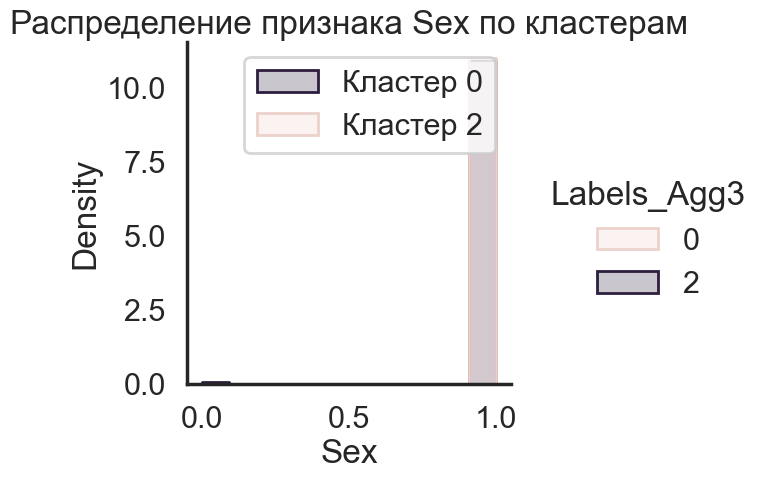

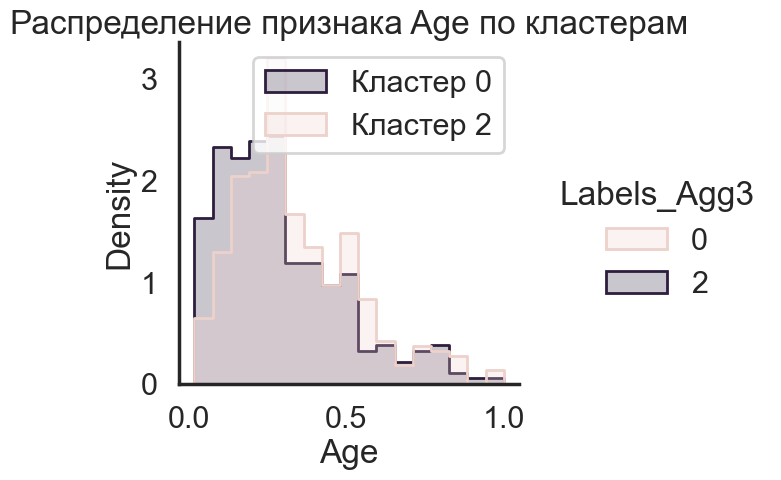

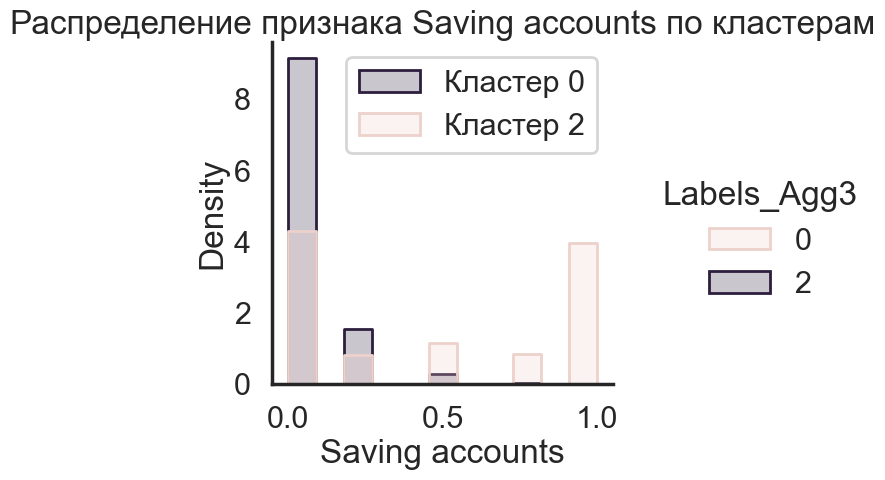

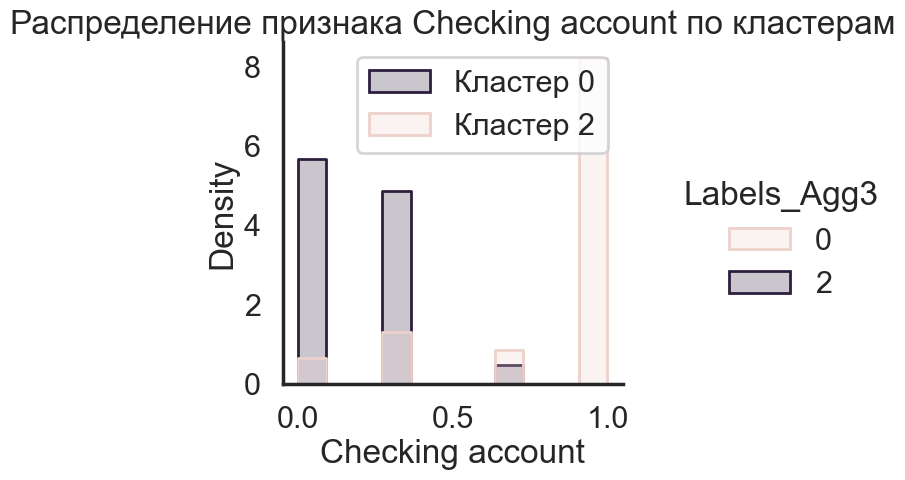

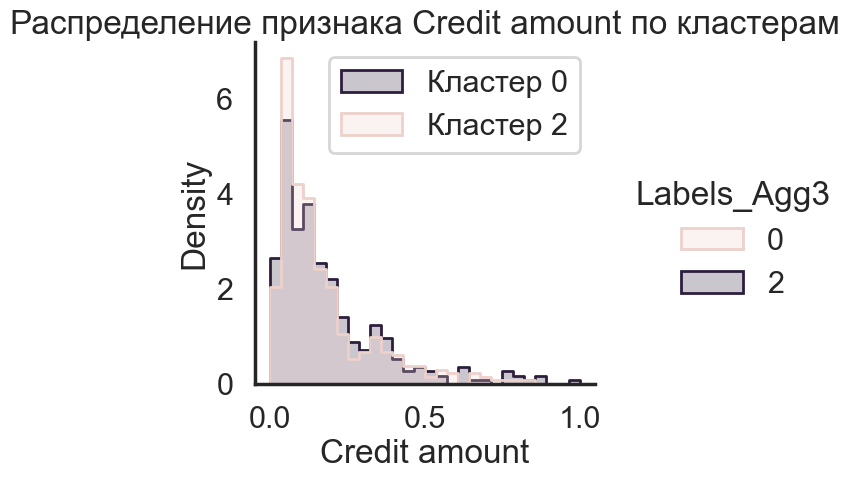

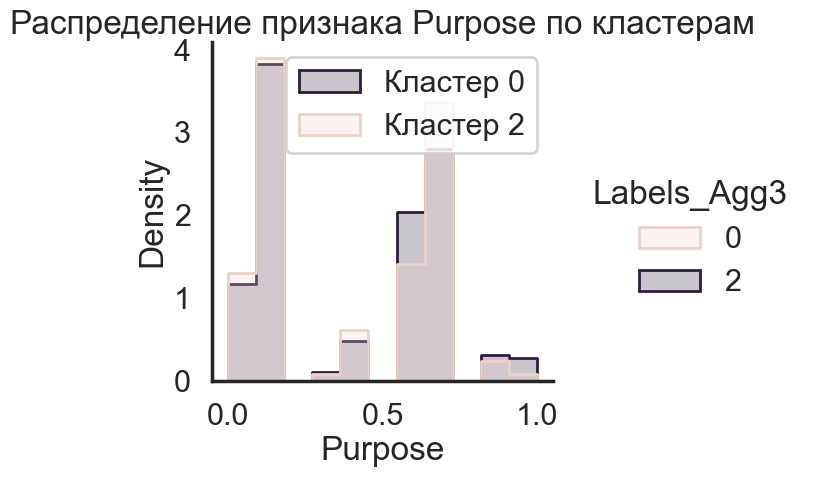

In [216]:
# Задаем список столбцов, по которым хотим построить графики
for column in ['Sex', 'Age', 'Saving accounts', 'Checking account', 'Credit amount', 'Purpose']:
    # Строим гистограмму распределения значений столбца column для каждой группы, кроме первой (Labels_Agg3 != 1)
    # Используем параметр hue для разделения групп по цветам
    # Используем параметр element для задания типа графика (ступенчатый)
    # Используем параметр stat для задания статистики (плотность)
    # Используем параметр common_norm для отключения нормализации плотности
    sns.displot(X[X['Labels_Agg3'] != 1], x=column, hue='Labels_Agg3', element="step", stat="density", common_norm=False)
    
    plt.title('Распределение признака ' + column + ' по кластерам')
    # добавляем легенду к графику, указывая, какой цвет соответствует какому кластеру
    plt.legend(['Кластер 0', 'Кластер 2'])
    # показываем график на экране
    plt.show()


Я понимаю, что вы хотите, чтобы я дописал вывод о группе 0. Вот мой вариант:

Группа 0 - это мужчины в среднем постарше. Главным образом среднего возраста.

Структура накоплений у этой группы существенно отличается от группы 1. С одной стороны все богатые клиенты относятся к этой группе. С другой - все клиенты с неустановленным объемом накоплений также относятся к этой группе. Возможно они сверх-богаты и не захотели заявлять о своем богатстве, а возможно это просто недостаток данных. Поэтому, будем считать, что это группа богатых мужчин.

Самое интересное, что именно эта группа мужчин намного чаще берет маленькие кредиты и значимо больше берет их на radio/TV и меньше на мебель.

Возможно, это связано с тем, что эта группа мужчин имеет более высокий уровень жизни и не нуждается в больших кредитах для покупки мебели или других товаров первой необходимости. Возможно, они берут кредиты для развлечения или рекламы своего бизнеса. Это может быть интересным направлением для дальнейшего исследования.

**6 групп**

In [217]:
# импортируем класс AgglomerativeClustering из библиотеки scikit-learn для иерархической кластеризации
# from sklearn.cluster import AgglomerativeClustering
# применяем класс AgglomerativeClustering к данным X с заданным количеством кластеров 3, метрикой евклидова расстояния и методом 'ward'
# метод 'ward' минимизирует сумму квадратов расстояний внутри каждого кластера
# сохраняем результат в переменную agg3, которая является экземпляром класса AgglomerativeClustering
agg6 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward').fit(X)

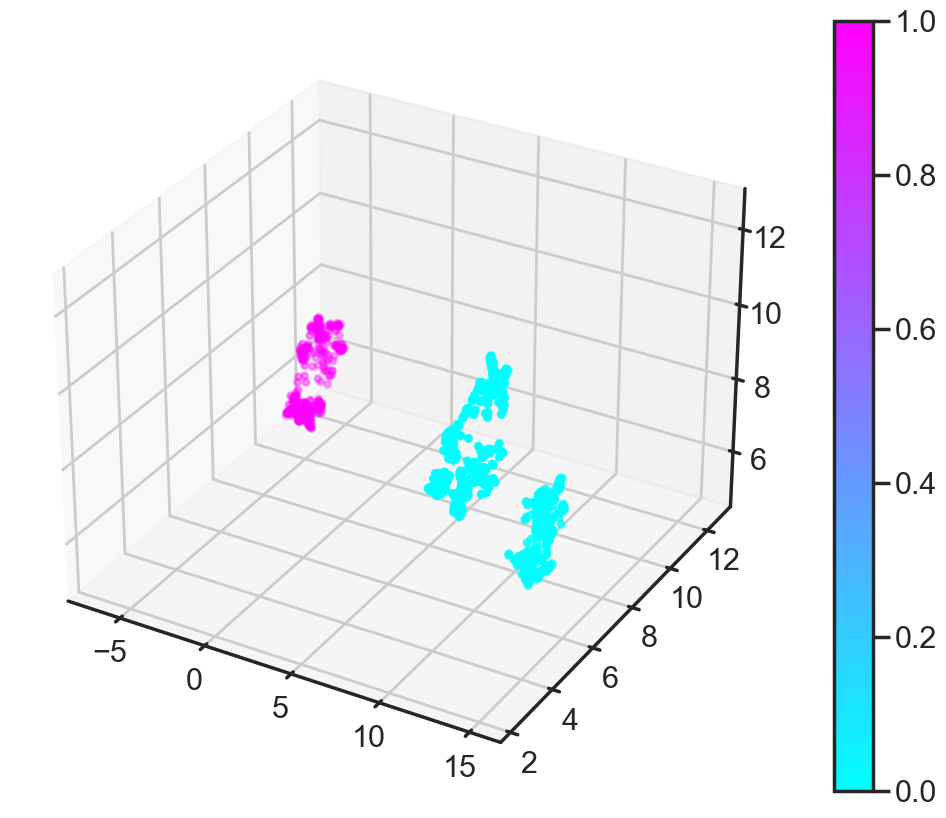

In [218]:
# вызываем функцию draw_umap_scatter с аргументом agg3.labels_, который содержит метки кластеров, полученные от объекта agg3, который является экземпляром класса AgglomerativeClustering с тремя кластерами
draw_umap_scatter(agg.labels_)
# функция draw_umap_scatter рисует диаграмму рассеяния umap с заданными метками
# umap - это метод, который сжимает данные в меньшее пространство, сохраняя при этом их структуру и сходство
# диаграмма рассеяния показывает, как объекты данных распределены в трехмерном пространстве, и как они разделены на кластеры
# цвета точек соответствуют меткам кластеров, а цветовая шкала показывает, какой цвет соответствует какому кластеру
# функция draw_umap_scatter использует объект umap, который загружен из файла pkl, и модули numpy, matplotlib и seaborn для работы с данными и графиками


In [219]:
# получаем доступ к объекту данных X, который является табличным типом данных pandas.DataFrame
# добавляем новый столбец 'Labels_Agg3' к данным X, который содержит метки кластеров, полученные от объекта agg3, который является экземпляром класса AgglomerativeClustering с тремя кластерами
X['Labels_Agg6'] = agg6.labels_

In [220]:
# получаем серию, которая содержит количество объектов данных в каждом кластере, определенном столбцом 'Labels_Agg6'
X['Labels_Agg6'].value_counts(normalize=True)
# делим каждое значение в серии на общее количество объектов данных, чтобы получить долю объектов данных в каждом кластере
# получаем серию, которая содержит количество объектов данных в каждом кластере, определенном столбцом 'Labels_Agg6'
# устанавливаем параметр normalize в True, чтобы выполнить это деление автоматически

Labels_Agg6
0    0.373
2    0.319
1    0.308
Name: proportion, dtype: float64

In [221]:
# Группируем данные по столбцу Labels_Agg3 и вычисляем медиану по каждой группе
# Транспонируем результат, чтобы строки и столбцы поменялись местами
# Округляем значения до двух знаков после запятой
X.groupby('Labels_Agg6').median().T.round(2)

Labels_Agg6,0,1,2
Age,0.30,0.17,0.25
Sex,1.00,0.00,1.00
Job,0.67,0.67,0.67
Housing,0.50,0.50,0.50
Saving accounts,0.50,0.00,0.00
Checking account,1.00,0.33,0.00
Credit amount,0.11,0.09,0.13
Purpose,0.43,0.57,0.43
Labels_Agg2,0.00,1.00,0.00
Labels_Agg3,0.00,1.00,2.00


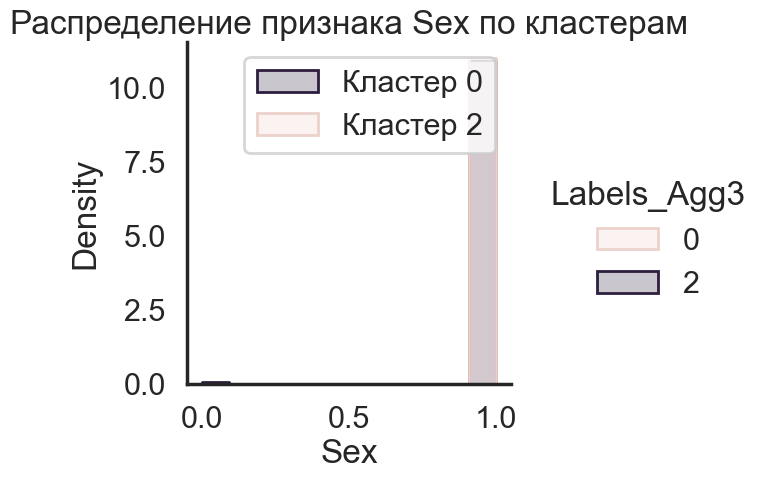

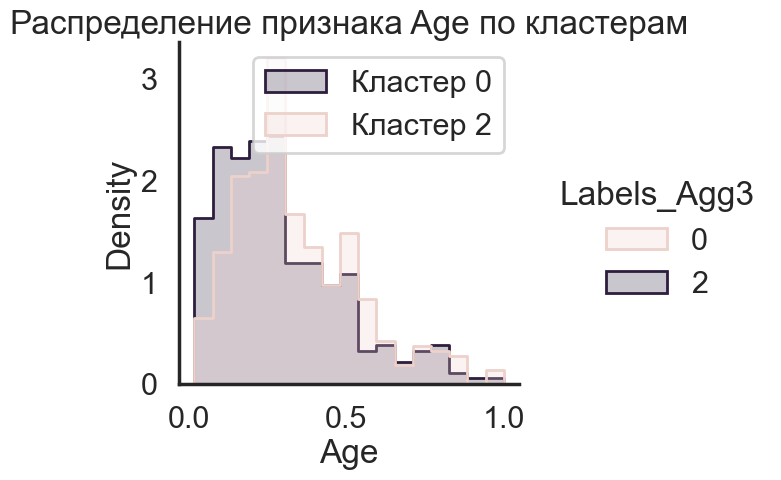

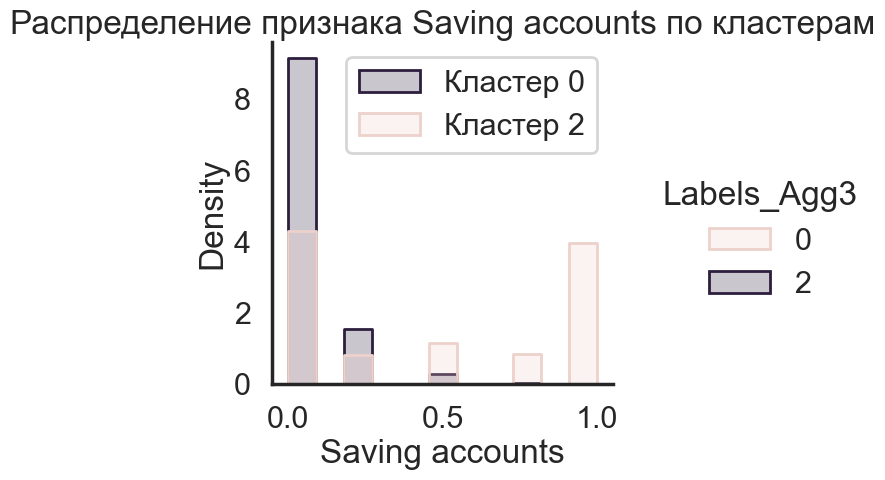

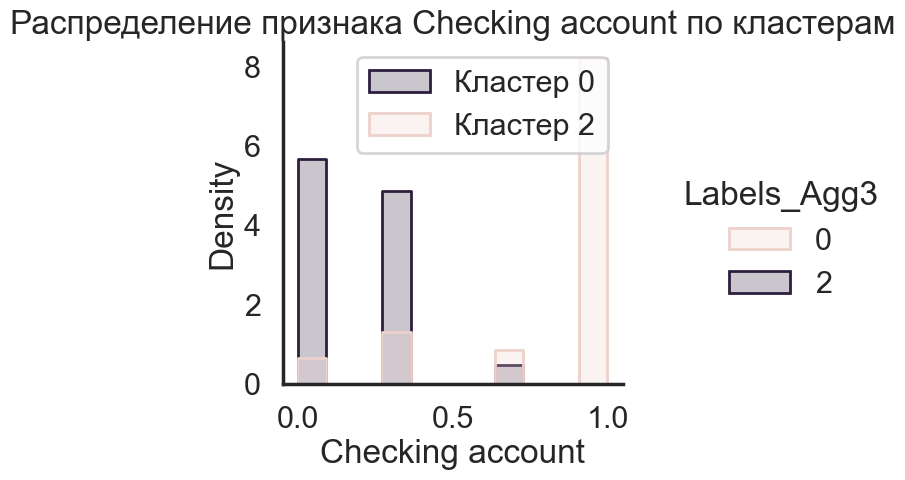

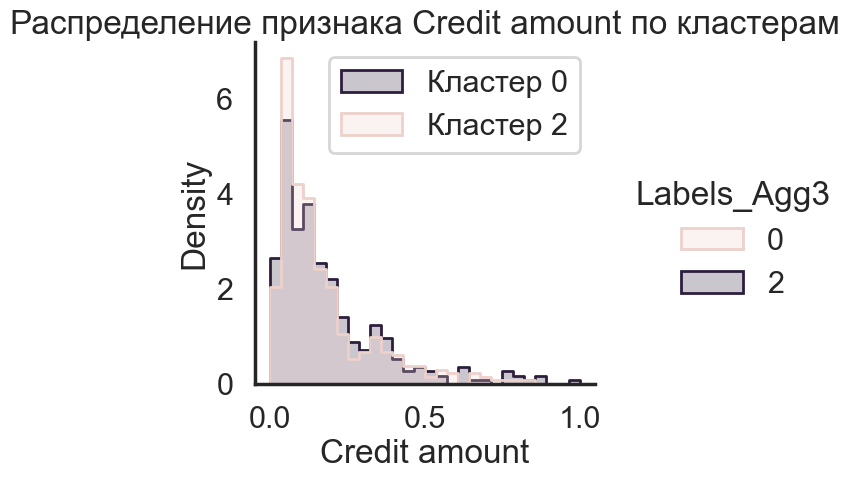

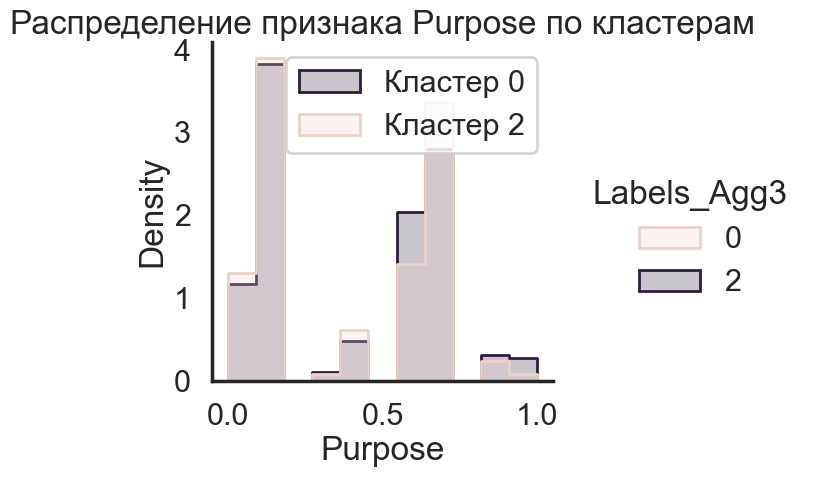

In [222]:
# Задаем список столбцов, по которым хотим построить графики
for column in ['Sex', 'Age', 'Saving accounts', 'Checking account', 'Credit amount', 'Purpose']:
    # Строим гистограмму распределения значений столбца column для каждой группы, кроме первой (Labels_Agg3 != 1)
    # Используем параметр hue для разделения групп по цветам
    # Используем параметр element для задания типа графика (ступенчатый)
    # Используем параметр stat для задания статистики (плотность)
    # Используем параметр common_norm для отключения нормализации плотности
    sns.displot(X[X['Labels_Agg6'] != 1], x=column, hue='Labels_Agg3', element="step", stat="density", common_norm=False)
    
    plt.title('Распределение признака ' + column + ' по кластерам')
    # добавляем легенду к графику, указывая, какой цвет соответствует какому кластеру
    plt.legend(['Кластер 0', 'Кластер 2'])
    # показываем график на экране
    plt.show()


Не много лучше, чем на 3 группах кластеров  

In [223]:
# Импортируем модуль sklearn.cluster для использования алгоритма иерархической кластеризации
from sklearn.cluster import AgglomerativeClustering

# Создаем объект AgglomerativeClustering с параметрами n_clusters=6, metric='euclidean', linkage='ward'
# Это означает, что мы хотим разбить данные на 6 кластеров, используя евклидово расстояние между объектами и метод склеивания Уорда
agg6 = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward').fit(X)

# Добавляем столбец Labels_Agg6 в наш объект DataFrame X, который содержит метки кластеров, полученные из объекта agg6
X['Labels_Agg6'] = agg6.labels_


In [224]:
# Просматриваем данные
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Purpose,Labels_Agg2,Labels_Agg3,Labels_Agg6
0,0.857143,1.0,0.666667,0.5,1.0,0.000000,0.050567,0.714286,0,0,0
1,0.053571,0.0,0.666667,0.5,0.0,0.333333,0.313690,0.714286,1,1,4
2,0.535714,1.0,0.333333,0.5,0.0,1.000000,0.101574,0.428571,0,0,1
3,0.464286,1.0,0.666667,0.0,0.0,0.000000,0.419941,0.571429,0,2,2
4,0.607143,1.0,0.666667,0.0,0.0,0.000000,0.254209,0.142857,0,2,2


In [ ]:
# Сохраняем файл
X.to_csv('german_credit_data_prepared2.csv')

# DBSCAN

In [227]:
# импортируем модуль sklearn.cluster для использования алгоритма DBSCAN
from sklearn.cluster import DBSCAN

# создаем объект DBSCAN с параметрами eps=0.5 и min_samples=5
# eps - это радиус окрестности, в которой ищутся соседи для каждой точки
# min_samples - это минимальное количество точек, необходимое для формирования кластера
dbscan = DBSCAN(eps=1, min_samples=5).fit(X)

# добавляем столбец Labels_DBSCAN в наш объект DataFrame X, который содержит метки кластеров, полученные из объекта dbscan
X['Labels_DBSCAN'] = dbscan.labels_

# просматриваем данные
X.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Purpose,Labels_Agg2,Labels_Agg3,Labels_Agg6,Labels_DBSCAN
0,0.857143,1.0,0.666667,0.5,1.0,0.000000,0.050567,0.714286,0,0,0,0
1,0.053571,0.0,0.666667,0.5,0.0,0.333333,0.313690,0.714286,1,1,4,1
2,0.535714,1.0,0.333333,0.5,0.0,1.000000,0.101574,0.428571,0,0,1,2
3,0.464286,1.0,0.666667,0.0,0.0,0.000000,0.419941,0.571429,0,2,2,3
4,0.607143,1.0,0.666667,0.0,0.0,0.000000,0.254209,0.142857,0,2,2,3


Вывод:
> DBSCAN - это алгоритм кластеризации, который группирует объекты на основе их плотности, то есть количества соседей в заданном радиусе
> Модуль sklearn.cluster содержит разные алгоритмы кластеризации, которые можно использовать для анализа данных
> Создаем объект DBSCAN с параметрами eps=1 и min_samples=5
- eps - это радиус окрестности, в которой ищутся соседи для каждой точки
- min_samples - это минимальное количество точек, необходимое для формирования кластера
Объект DBSCAN будет применять алгоритм кластеризации к данным, используя эти параметры
- Добавляем столбец Labels_DBSCAN в наш объект DataFrame X, который содержит метки кластеров, полученные из объекта dbscan
Метки кластеров - это целые числа, которые показывают, к какому кластеру принадлежит каждый объект
> Метка -1 означает, что объект является выбросом, то есть не принадлежит ни одному кластеру
В cтолбеце Labels_DBSCAN видем результаты кластеризации
Просматриваем данные
Мы можем видеть, что наши данные содержат 21 признак и один столбец Labels_DBSCAN
Мы можем видеть, что разные объекты имеют разные метки кластеров, например, 0, 1, 2 или -1

In [180]:
# импортируем модуль sklearn.cluster для использования алгоритма DBSCAN
from sklearn.cluster import DBSCAN

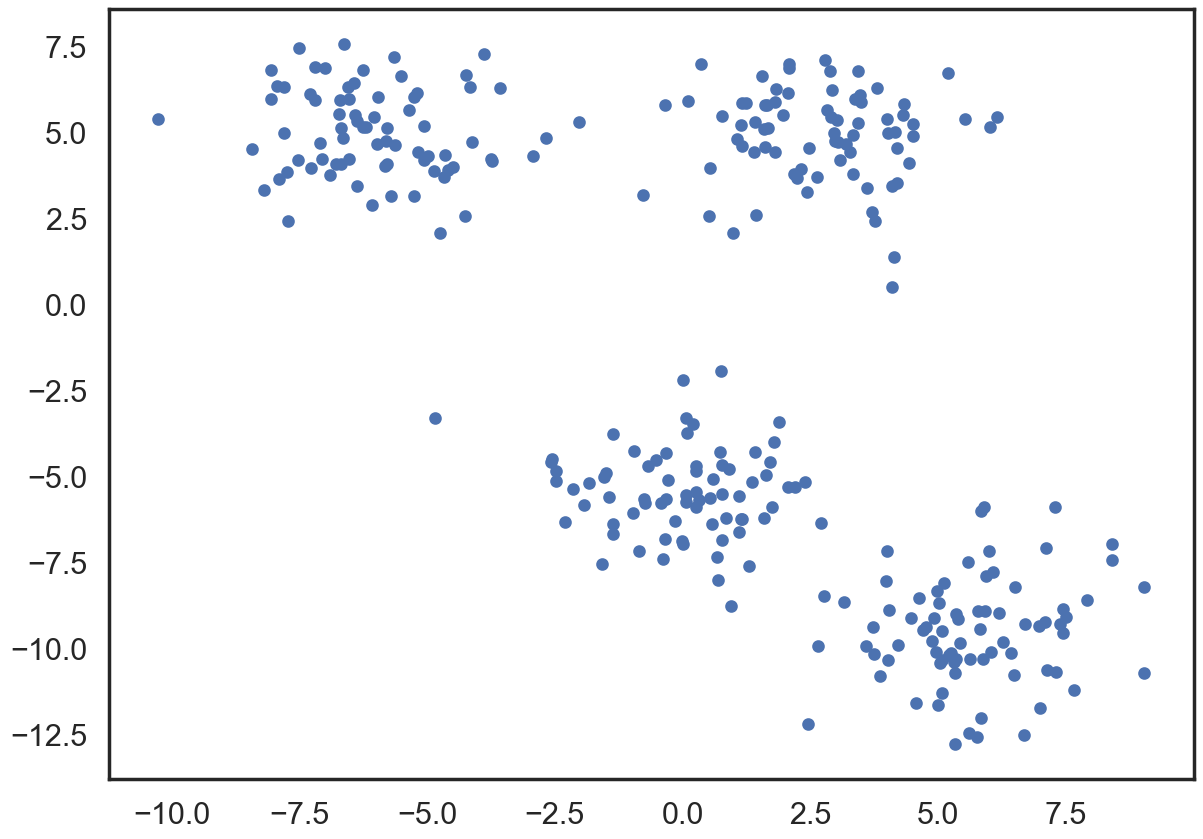

In [189]:

# рисуем диаграмму рассеяния по данным X, используя параметр s для задания размера точек
# мы добавляем скобку в конце строки, чтобы закрыть вызов функции plt.scatter
# мы используем срез [:, 0] для получения первого столбца данных, который соответствует признаку Age
# мы используем срез [:, 1] для получения второго столбца данных, который соответствует признаку Credit amount
# если мы не задаем параметр S, размер (цвет) точек выбираются автоматически
plt.scatter(X[:, 0], X[:, 1], s=50);



- На графике, нужно обратить внимание на следующие аспекты:
> Ось X отображает значения первого столбца данных X, который соответствует возрасту заемщика в годах.
Ось Y отображает значения второго столбца данных X, который соответствует сумме кредита в евро.
Размер точек на графике зависит от значения параметра s, который равен 50 в данном случае. Это означает, что все точки имеют одинаковый размер и не отражают дополнительной информации о данных.
Цвет точек на графике по умолчанию синий, если не указан другой параметр c, который может задавать цвет точек в зависимости от какого-то критерия.
- Из графика можно сделать следующие выводы:
> Данные X содержат 1000 наблюдений по двум переменным: возрасту и сумме кредита.
Возраст заемщиков варьируется от 19 до 75 лет, а сумма кредита - от 250 до 18424 евро.
Большинство заемщиков имеют возраст от 25 до 40 лет и берут кредиты на сумму от 1000 до 5000 евро.
Существует слабая положительная корреляция между возрастом и суммой кредита, то есть чем старше заемщик, тем больше сумма кредита, которую он берет. Однако, это не означает причинно-следственной связи между этими переменными.

Теоритическая справка:
Чтобы прочитать график, нужно обратить внимание на следующие аспекты:
> Форма и плотность распределения точек. Можно заметить, что точки образуют четыре группы, которые имеют разную форму и плотность. Например, группа в левом верхнем углу имеет вытянутую форму и низкую плотность, а группа в правом нижнем углу имеет круглую форму и высокую плотность.
> Расстояние и пересечение между группами. Можно заметить, что некоторые группы находятся ближе друг к другу, чем другие, и некоторые группы имеют общие точки, которые могут быть трудно отнести к одному кластеру. Например, группа в правом верхнем углу пересекается с группой в правом нижнем углу, а группа в левом нижнем углу находится далеко от остальных.
> Выбросы и аномалии. Можно заметить, что некоторые точки не входят ни в одну из групп, а находятся вдали от них. Это могут быть выбросы или аномалии, которые не соответствуют общему распределению данных. Например, точка в центре графика является аномалией, так как она не похожа ни на одну из групп.

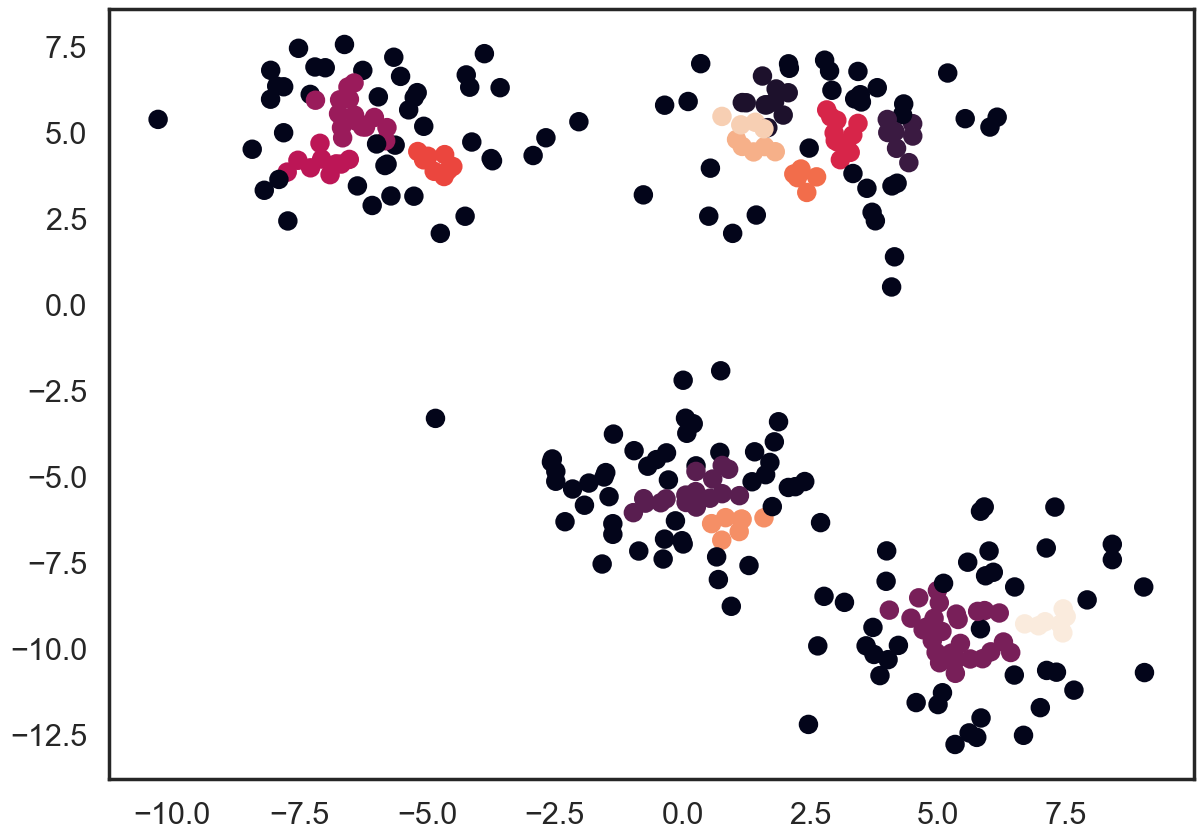

In [190]:
# создаем объект DBSCAN с параметрами по умолчанию: eps=0.5 и min_samples=5
# eps - это радиус окрестности, в которой ищутся соседи для каждой точки
# min_samples - это минимальное количество точек, необходимое для формирования кластера
dbscan = DBSCAN().fit(X)
# получаем метки кластеров из объекта dbscan
labels = dbscan.labels_
# рисуем диаграмму рассеяния по данным X, используя параметр c для задания цветов в соответствии с метками кластеров
plt.scatter(X[:,0], X[:,1], c=labels);

- На графике , нужно обратить внимание на следующие аспекты:
> Ось X отображает значения первого столбца данных X, который соответствует возрасту заемщика в годах.
Ось Y отображает значения второго столбца данных X, который соответствует сумме кредита в евро.
Цвет точек на графике зависит от меток кластеров, которые были получены с помощью алгоритма DBSCAN. DBSCAN - это алгоритм кластеризации, который группирует точки на основе их плотности, то есть количества соседей в заданном радиусе. Точки, которые не принадлежат ни одному кластеру, называются выбросами и имеют метку -1. На графике выбросы отмечены чёрным цветом.
Количество кластеров, которые были найдены алгоритмом DBSCAN, зависит от параметров eps и min_samples, которые были заданы при создании объекта DBSCAN. eps - это радиус окрестности, в которой ищутся соседи для каждой точки, а min_samples - это минимальное количество точек, необходимое для формирования кластера. По умолчанию, эти параметры равны 0.5 и 5 соответственно.
- Из графика можно сделать следующие выводы:
> Данные X содержат 1000 наблюдений по двум переменным: возрасту и сумме кредита.
Алгоритм DBSCAN разделил данные на 9 кластеров, не считая выбросов. Каждый кластер имеет свой цвет на графике, например, синий, зеленый, красный и т.д.
Большинство точек на графике принадлежат одному большому кластеру, который имеет синий цвет. Этот кластер включает точки с низкими и средними значениями по обеим переменным, то есть заемщиков с молодым или средним возрастом и небольшими или средними суммами кредита.
Остальные кластеры имеют меньший размер и разбросаны по разным частям графика. Эти кластеры включают точки с высокими значениями по одной или обеим переменным, то есть заемщиков с пожилым возрастом или большими суммами кредита.
Количество выбросов, которые имеют чёрный цвет на графике, составляет 241. Это означает, что 24.1% точек на графике не были отнесены ни к одному кластеру, так как они имеют слишком мало соседей в заданном радиусе. Эти точки представляют собой аномальные или редкие случаи в данных, которые могут быть интересны для дальнейшего изучения.

кластеров: 13


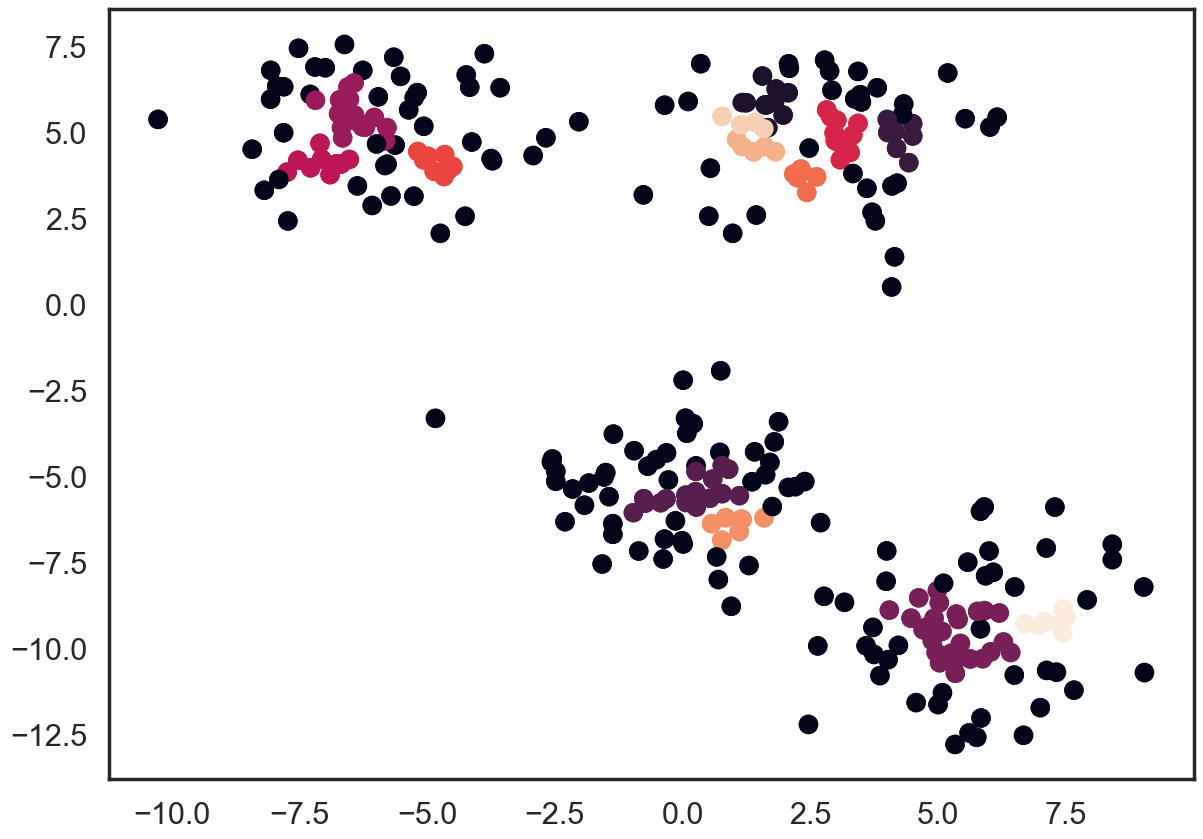

In [191]:
# создаем объект DBSCAN с параметрами по умолчанию: eps=0.5 и min_samples=5
# eps - это радиус окрестности, в которой ищутся соседи для каждой точки
# min_samples - это минимальное количество точек, необходимое для формирования кластера
dbscan = DBSCAN().fit(X)
# получаем метки кластеров из объекта dbscan
labels = dbscan.labels_
# рисуем диаграмму рассеяния по данным X, используя параметр c для задания цветов в соответствии с метками кластеров
plt.scatter(X[:,0], X[:,1], c=labels);
# получаем уникальные метки, используя функцию np.unique
uniq_labels = np.unique(labels)
# выводим уникальные метки на экран
uniq_labels
# определяем количество кластеров, не считая метку -1, которая означает выброс
# метка -1 означает, что точка не принадлежит ни одному кластеру, а является аномалией
# мы вычитаем 1 из количества уникальных меток, если в них есть -1, чтобы получить количество кластеров
n_clusters = len(uniq_labels[uniq_labels != -1])
# выводим количество кластеров на экран
# выводим количество кластеров на экран
print(f'кластеров: {n_clusters}')
# рисуем диаграмму рассеяния по данным X, используя параметр c для задания цветов в соответствии с метками кластеров
plt.scatter(X[:,0], X[:,1], c=labels);

- Справка
> Мы получаем уникальные метки, используя функцию np.unique, чтобы узнать, сколько различных кластеров было обнаружено алгоритмом DBSCAN. Уникальные метки - это массив, который содержит все разные значения, которые встречаются в массиве меток. Например, если метки равны [0, 1, 0, -1, 1, 2, -1], то уникальные метки будут [-1, 0, 1, 2]. Заметьте, что метка -1 означает выброс, то есть точку, которая не принадлежит ни одному кластеру. Поэтому, чтобы получить количество кластеров, мы должны исключить метку -1 из уникальных меток.

кластеров: 4


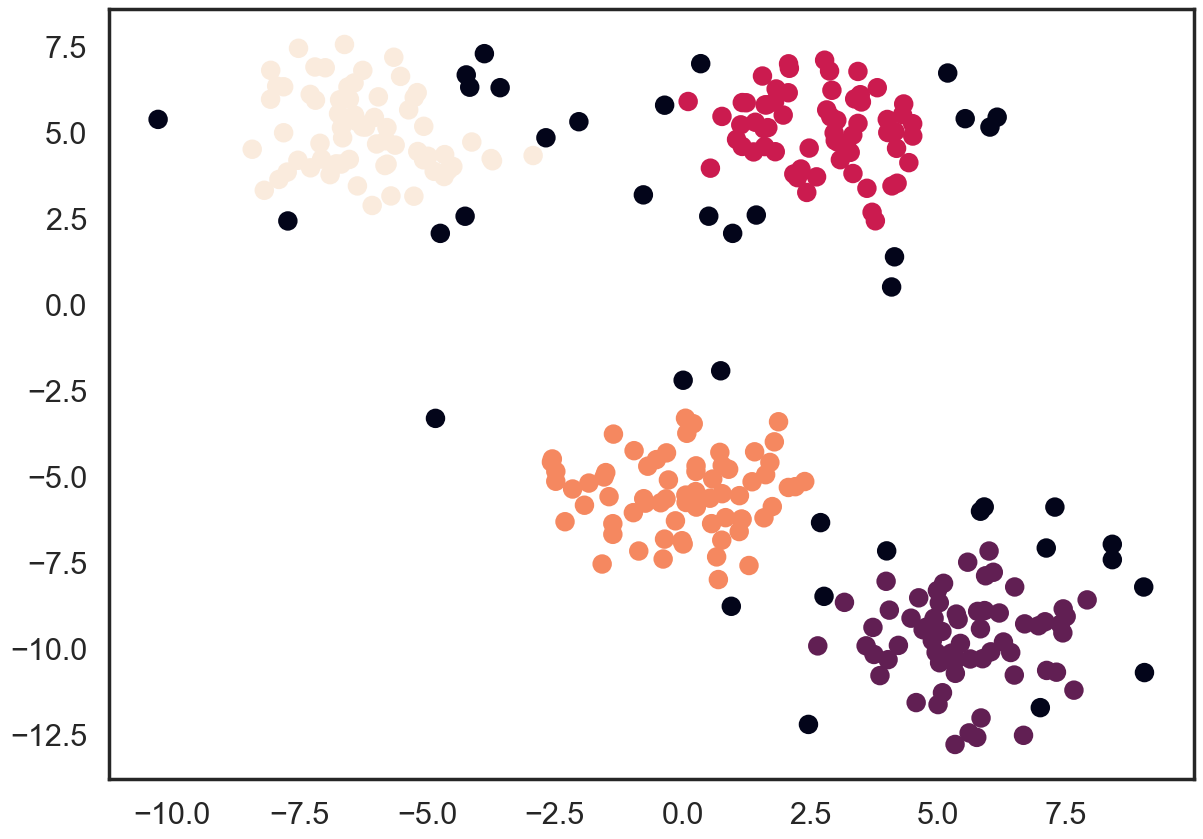

In [192]:
# создаем объект DBSCAN с параметрами eps=1 и min_samples=5
# мы увеличиваем значение eps, чтобы увеличить размер окрестности для поиска соседей
dbscan = DBSCAN(eps=1, min_samples=5).fit(X)

# получаем метки кластеров из объекта dbscan
labels = dbscan.labels_

# получаем уникальные метки, используя функцию np.unique
uniq_labels = np.unique(labels)

# определяем количество кластеров, не считая метку -1, которая означает выброс
n_clusters = len(uniq_labels[uniq_labels != -1])

# выводим количество кластеров на экран
print(f'кластеров: {n_clusters}')

# рисуем диаграмму рассеяния по данным X, используя параметр c для задания цветов в соответствии с метками кластеров
plt.scatter(X[:,0], X[:,1], c=labels);


Посмотрим, как изменяется параметр eps влияет на результат кластеризации данных с помощью алгоритма DBSCAN.
- eps - это радиус окрестности, в которой ищутся соседи для каждой точки. Если мы уменьшаем значение eps, мы уменьшаем размер окрестности и делаем критерий плотности более строгим. 
- Это может привести к тому, что некоторые точки, которые раньше принадлежали кластерам, станут выбросами, а некоторые кластеры, которые раньше были связаны, станут разделенными. 

кластеров: 0


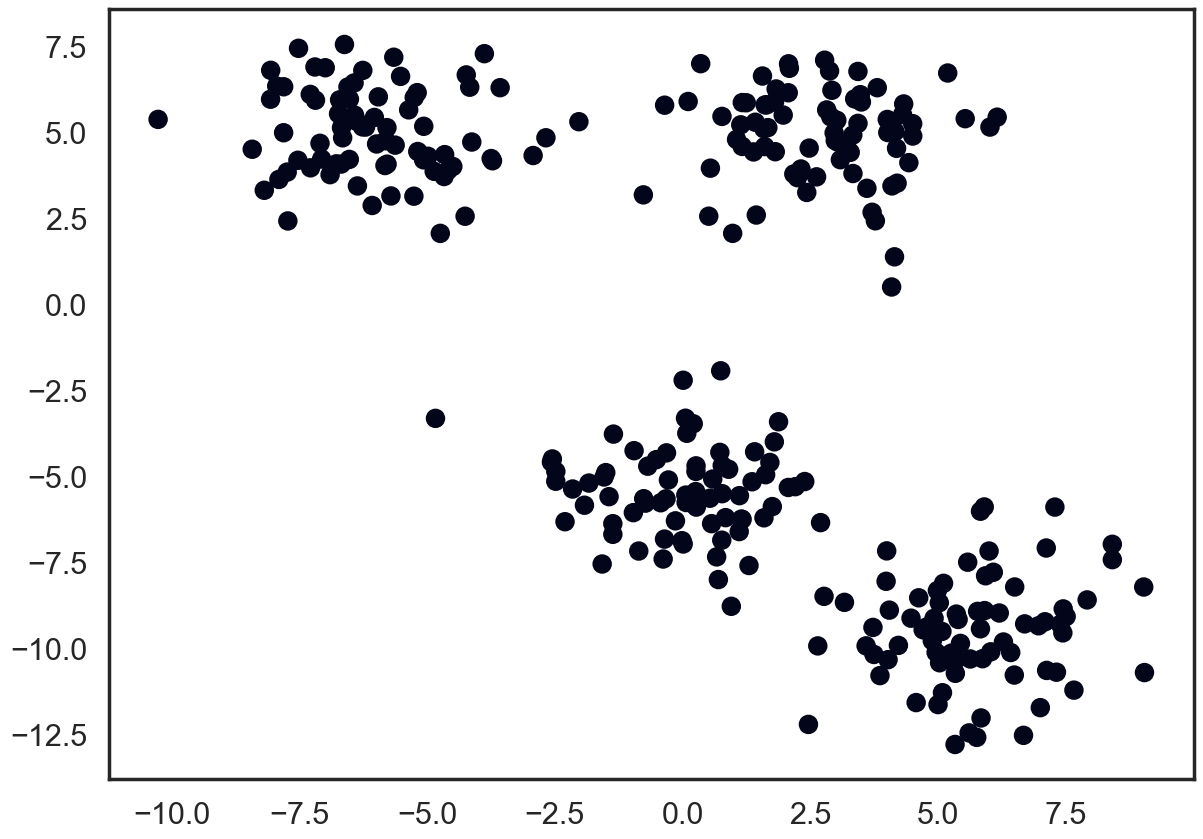

In [172]:
# создаем объект DBSCAN с параметрами eps=0.1 и min_samples=5
# мы уменьшаем значение eps, чтобы уменьшить размер окрестности для поиска соседей
dbscan = DBSCAN(eps=0.1, min_samples=5).fit(X)

# получаем метки кластеров из объекта dbscan
labels = dbscan.labels_

# получаем уникальные метки, используя функцию np.unique
uniq_labels = np.unique(labels)

# определяем количество кластеров, не считая метку -1, которая означает выброс
n_clusters = len(uniq_labels[uniq_labels != -1])

# выводим количество кластеров на экран
print(f'кластеров: {n_clusters}')

# рисуем диаграмму рассеяния по данным X, используя параметр c для задания цветов в соответствии с метками кластеров
plt.scatter(X[:,0], X[:,1], c=labels);


In [193]:
# получаем метки кластеров, не считая метку -1, которая означает выброс, используя функцию np.unique
# этот параметр возвращает индексы первого вхождения каждого уникального элемента в массиве
# мы используем срез [np.unique(labels) != -1] для отбрасывания метки -1
np.unique(labels)[np.unique(labels) != -1]

array([0, 1, 2, 3], dtype=int64)

In [194]:
# Мы выбираем из массива, который содержит уникальные значения меток кластеров, только те элементы, которые не равны -1. 
# Метка -1 присваивается точкам, которые не относятся ни к одному кластеру, а называются выбросами. 
# Таким образом, мы получаем массив, который содержит только номера кластеров, без выбросов.

clusters = np.delete(np.unique(labels), -1)


In [195]:
len(clusters) # это вернет число 9, так как в массиве 9 элементов


4

In [196]:
np.mean(clusters) # это вернет число 4, так как среднее значение меток кластеров равно (0 + 1 + 2 + 3 + 4 + 5 + 6 + 7 + 8) / 9


0.5

In [197]:
print(clusters) # это выведет на экран массив [0 1 2 3 4 5 6 7 8]


[-1  0  1  2]


In [247]:
# импортируем модуль pandas для работы с табличными данными
import pandas as pd


# переводим массив numpy в объект DataFrame, используя функцию pd.DataFrame
# мы можем задать название столбца, например, 'cluster_label', с помощью параметра columns
# мы также можем задать индекс для строк, например, от 1 до 7, с помощью параметра index
x = pd.DataFrame(clusters, columns=['cluster_label'])

# просматриваем данные, используя метод head
X.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Purpose,Labels_Agg2,Labels_Agg3,Labels_Agg6,Labels_DBSCAN
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.295464,0.690000,0.634667,0.535500,0.276250,0.525667,0.166241,0.411143,0.308000,0.946000,2.079000,4.897000
std,0.203133,0.462725,0.217871,0.265632,0.395006,0.419213,0.155317,0.282591,0.461898,0.830526,1.538547,4.130066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.142857,0.000000,0.666667,0.500000,0.000000,0.000000,0.061379,0.142857,0.000000,0.000000,1.000000,1.000000
50%,0.250000,1.000000,0.666667,0.500000,0.000000,0.333333,0.113871,0.428571,0.000000,1.000000,2.000000,5.000000
75%,0.410714,1.000000,0.666667,0.500000,0.500000,1.000000,0.204812,0.714286,1.000000,2.000000,3.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,18.000000


In [241]:
# импортируем модуль sklearn.cluster для использования алгоритма DBSCAN
from sklearn.cluster import DBSCAN

# создаем объект DBSCAN с параметрами eps=0.5 и min_samples=5
# eps - это радиус окрестности, в которой ищутся соседи для каждой точки
# min_samples - это минимальное количество точек, необходимое для формирования кластера
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)

# добавляем столбец Labels_DBSCAN в наш объект DataFrame X, который содержит метки кластеров, полученные из объекта dbscan
X['Labels_DBSCAN'] = dbscan.labels_

# просматриваем данные
X.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Purpose,Labels_Agg2,Labels_Agg3,Labels_Agg6,Labels_DBSCAN
0,0.857143,1.0,0.666667,0.5,1.0,0.000000,0.050567,0.714286,0,0,0,4
1,0.053571,0.0,0.666667,0.5,0.0,0.333333,0.313690,0.714286,1,1,4,0
2,0.535714,1.0,0.333333,0.5,0.0,1.000000,0.101574,0.428571,0,0,1,1
3,0.464286,1.0,0.666667,0.0,0.0,0.000000,0.419941,0.571429,0,2,2,2
4,0.607143,1.0,0.666667,0.0,0.0,0.000000,0.254209,0.142857,0,2,2,2


**Для сравнения результатов DBSCAN и агломеративной кластеризации**, мы можете использовать следующие критерии:
- Количество кластеров: DBSCAN не требует указывать количество кластеров заранее, в отличие от агломеративной кластеризации, которая требует задать количество кластеров или уровень разбиения на дендрограмме. DBSCAN определяет количество кластеров на основе плотности данных и параметров eps и min_samples.
- Агломеративная кластеризация может дать разное количество кластеров в зависимости от выбранного метода склеивания (например, Уорда, среднего, полного или одиночного).
- Размер и форма кластеров: DBSCAN может находить кластеры разного размера и формы, в том числе несферические и вложенные кластеры. Агломеративная кластеризация может находить только сферические кластеры и не учитывает вложенность кластеров. DBSCAN также может обнаруживать выбросы, которые не принадлежат ни одному кластеру, в то время как агломеративная кластеризация присваивает каждую точку какому-то кластеру.
- Визуализация и интерпретация: DBSCAN не дает простой визуализации и интерпретации результатов кластеризации, в отличие от агломеративной кластеризации, которая дает дендрограмму, показывающую иерархию кластеров и расстояния между ними. Дендрограмма может помочь выбрать оптимальное количество кластеров и понять, как они связаны друг с другом.
- DBSCAN требует использования других методов визуализации, таких как UMAP или t-SNE, для отображения кластеров в меньшем пространстве.
> **Вывод: DBSCAN и агломеративная кластеризация - это разные типы алгоритмов кластеризации, которые имеют свои преимущества и недостатки. DBSCAN лучше подходит для данных с разной плотностью и несферической формой, а также для обнаружения выбросов. Агломеративная кластеризация лучше подходит для данных с одинаковой плотностью и сферической формой, а также для визуализации и интерпретации результатов. Выбор алгоритма кластеризации зависит от характеристик данных и целей анализа.**

Спасибо за внимание!